Project 2: Webscraping Analysis

Data scraped was scraped from 2 sources: 
    - https://moz.com/top500 : To grab the 500 most popular global domains as seen by Moz
    - http://urlquery.net/ : To inject each domain and recieve a dynamic analysis on certain website properties:
        *"Url", "IP.Address", "ASN", "IP.Location",
         "Report.Date", "UrlQuery.Alerts", "User.Agent",
         "Snort", "Suricata", "Fortinet", "MDL", "DNS.BH",
         "MS.DNS", "Openfish", "Phishtank", "Spamhaus",
         "JS.ES", "JS.EE", "JS.EW", "HTTP.Tranx"

In [51]:
# command for jupyter notebooks plot display
import os

os.getcwd()

'/Users/intothelight/nycdatascience/deepwaterlearning.github.io/project_02'

In [52]:
import csv
import pandas as pd

# Load the scraped csv data
data_loc ="data/scanned_urls.csv"
website = pd.read_csv(data_loc)
website

,Url,IP.Address,ASN,IP.Location,Report.Date,UrlQuery.Alerts,User.Agent,Snort,Suricata,Fortinet,MDL,DNS.BH,MS.DNS,Openfish,Phishtank,Spamhaus,JS.ES,JS.EE,JS.EW,HTTP.Tranx
0,http://washington.edu,128.95.155.198,AS73 University of Washington,United States,2017-04-29 17:12:42 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,11,0,1,51
1,http://fortune.com,54.192.3.50,"AS16509 Amazon.com, Inc.",United States,2017-04-28 20:47:35 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,100,42,1,177
2,http://venturebeat.com,192.0.66.2,"AS2635 Automattic, Inc",United States,2017-04-29 00:41:29 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,36,0,1,119
3,http://entrepreneur.com,151.101.128.69,"AS6983 Earthlink, Inc.",United States,2017-04-28 20:49:54 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,29,3,1,127
4,http://line.me,203.104.138.138,AS38631 LINE Corporation,Japan,2017-04-28 22:47:36 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,8,0,0,26
5,http://safedog.cn,110.86.5.91,AS4134 Chinanet,China,2017-04-29 17:57:34 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,12,0,2,69
6,http://stanford.edu,171.67.215.200,AS32 Stanford University,United States,2017-04-29 01:09:31 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,10,0,0,42
7,http://baiyewang.com,221.234.43.212,AS4134 Chinanet,China,2017-04-29 18:01:03 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,7,0,2,90
8,http://w3.org,128.30.52.45,AS3 Massachusetts Institute of Technology,United States,2017-04-28 22:20:40 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,2,0,0,52
9,http://doubleclick.net,216.58.201.174,AS15169 Google Inc.,United States,2017-04-28 20:21:21 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,8,0,0,50


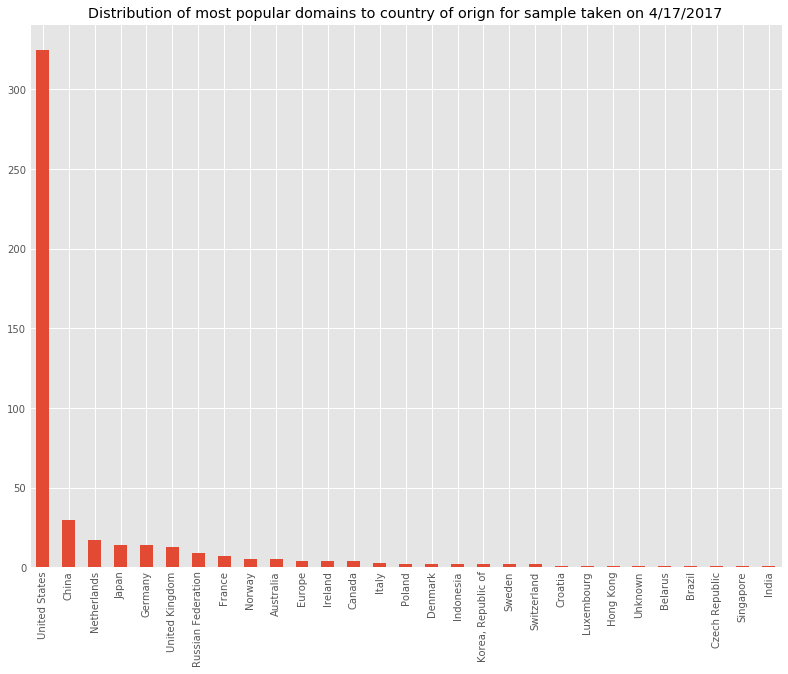

In [53]:
%matplotlib inline
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

graph_title = "Distribution of most popular domains to country of orign for sample taken on 4/17/2017"
website["IP.Location"].value_counts().plot(kind='bar', figsize=[12,10], title=graph_title)


In [64]:
# Any obvious alerts from agencies used?
website[(website["UrlQuery.Alerts"] !=0) | (website["Snort"] !=0) | (website["Suricata"] !=0)| 
        (website["Fortinet"] !=0)| (website["MDL"] !=0)| (website["DNS.BH"] !=0)| 
        (website["MS.DNS"] !=0) | (website["Openfish"] !=0) | (website["Phishtank"] !=0) | (website["Spamhaus"] !=0)]

,Url,IP.Address,ASN,IP.Location,Report.Date,UrlQuery.Alerts,User.Agent,Snort,Suricata,Fortinet,MDL,DNS.BH,MS.DNS,Openfish,Phishtank,Spamhaus,JS.ES,JS.EE,JS.EW,HTTP.Tranx
116,http://nih.gov,54.235.145.223,"AS14618 Amazon.com, Inc.",United States,2017-04-28 23:02:36 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,1,0,0,0,0,0,0,23,2,0,66
303,http://foursquare.com,151.101.192.154,"AS6983 Earthlink, Inc.",United States,2017-04-29 17:59:42 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,1,0,0,0,0,0,0,18,0,0,100
329,http://technorati.com,208.66.66.66,"AS16936 Technorati, Inc.",Unknown,2017-04-29 20:44:30 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,1,0,0,0,0,0,0,27,0,3,54
377,http://kickstarter.com,54.192.3.231,"AS16509 Amazon.com, Inc.",United States,2017-04-29 19:04:12 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,1,0,0,0,0,0,0,29,0,1,62
454,http://51.la,111.74.238.204,AS4134 Chinanet,China,2017-04-29 20:57:14 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,1,0,0,0,0,0,0,0,0,0,2


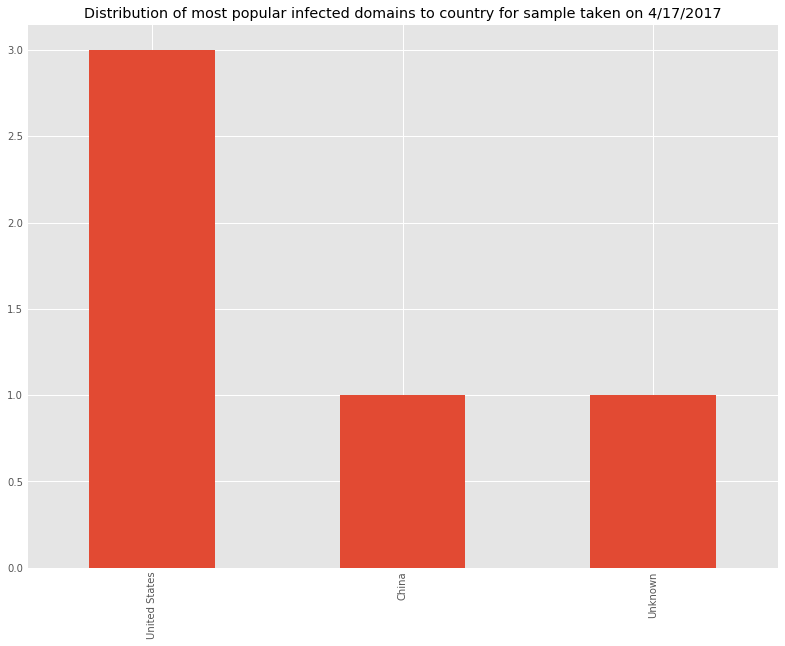

In [87]:
plt.style.use('ggplot')

graph_title = "Distribution of most popular infected domains to country for sample taken on 4/17/2017"
website[(website["Fortinet"] ==1)]["IP.Location"].value_counts().plot(kind='bar', figsize=[12,10], title=graph_title)

In [83]:
# what's the median value of http transactions for sites  flaged as potentially infected?
website[(website["Fortinet"] ==1)]["HTTP.Tranx"].median(axis=0)

62.0

In [84]:
# what's the median value of http transactions for sites not flaged as potentially infected?
website[(website["Fortinet"] ==0)]["HTTP.Tranx"].median(axis=0)

66.0

In [86]:
# what's the median value of javascript activity for infected vs not infected?
website.groupby("Fortinet")['JS.ES','JS.EE','JS.EW'].median()

,JS.ES,JS.EE,JS.EW
Fortinet,,,
0,24,0,0
1,23,0,0
